In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)


#load data
df = pd.read_csv('../data/data_collection.csv', encoding='Windows-1252')


In [3]:
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,Respondent_ID,Age_Group,Network_Provider,Internet_Usage_Frequency,Voice_Calling_Frequency,SMS_Usage_Frequency,Poor_Network_Frequency,Response_To_Network_Problems,Provider_Switch_History,Main_Frustration,Satisfaction_Rating,Satisfaction_Reason,App_Affinity,Hesitation_Factors,Reward_Motivation,Comfort_With_Background_Info_Collection
0,1,18-25,NaN,Daily,NaN,NaN,Often,Airplane mode,Yes,Unreliable,3,Location dependent,Yes,Not seeing results,Yes,Yes
1,2,18-25,NaN,Daily,NaN,NaN,Daily,Wait,Yes,Unreliable,1,Poor network,Yes,Not seeing results,Yes,Yes
2,3,18-25,NaN,Daily,NaN,NaN,Daily,Wait,Yes,Unreliable,2,Poor network,Yes,Many Notifications,Yes,Yes
3,4,18-25,NaN,Daily,NaN,NaN,Often,Switch,Yes,Unreliable,3,Poor network,Yes,Privacy,Yes,Yes
4,5,18-25,NaN,Daily,NaN,NaN,Often,Airplane mode,Yes,Unreliable,3,Poor network,Yes,Privacy,Yes,Yes


In [4]:
print(f"\nDataset Shape: {df.shape}")


Dataset Shape: (60, 16)


In [5]:
#checking for missing values
print(f"\nMissing Values: {df.isnull().sum()}")


Missing Values: Respondent_ID                               0
Age_Group                                   5
Network_Provider                           29
Internet_Usage_Frequency                   24
Voice_Calling_Frequency                    45
SMS_Usage_Frequency                        45
Poor_Network_Frequency                      0
Response_To_Network_Problems                0
Provider_Switch_History                     0
Main_Frustration                            1
Satisfaction_Rating                         0
Satisfaction_Reason                         0
App_Affinity                                0
Hesitation_Factors                          7
Reward_Motivation                           0
Comfort_With_Background_Info_Collection     0
dtype: int64


In [6]:
#checking for empty strings
print("\nEmpty strings in set:")
empty_strings = df.map(lambda x: x== '' if isinstance(x, str) else False).sum()
display(empty_strings[empty_strings > 0])


Empty strings in set:


Series([], dtype: int64)

In [7]:
# Check for duplicate records
print(f"\nNumber of duplicate records: {df.duplicated().sum()}")


Number of duplicate records: 0


In [8]:
#to start the data cleaning process, i removed the empty rows
df_clean = df.iloc[:60].copy()
#now replacing empty strings with NAN
df_clean =df_clean.replace('', np.nan)

#checking how much data is missing from each column as a percentage
missing_percentage = (df_clean.isnull().sum()/len(df_clean))*100
print("Percentage of missing values per column:")
display(missing_percentage.sort_values(ascending =False))

Percentage of missing values per column:


SMS_Usage_Frequency                        75.000000
Voice_Calling_Frequency                    75.000000
Network_Provider                           48.333333
Internet_Usage_Frequency                   40.000000
Hesitation_Factors                         11.666667
Age_Group                                   8.333333
Main_Frustration                            1.666667
Respondent_ID                               0.000000
Response_To_Network_Problems                0.000000
Poor_Network_Frequency                      0.000000
Satisfaction_Rating                         0.000000
Provider_Switch_History                     0.000000
Satisfaction_Reason                         0.000000
App_Affinity                                0.000000
Reward_Motivation                           0.000000
Comfort_With_Background_Info_Collection     0.000000
dtype: float64

In [9]:
#distribution of network provider data it is categorical
print("\nNetwork Provider Distribution:")
display(df_clean['Network_Provider'].value_counts(dropna=False))


Network Provider Distribution:


Network_Provider
NaN                     29
MTN                     15
MTN, Orange              5
MTN, Camtel              4
MTN, Orange, Camtel      3
Orange                   2
 MTN, Orange, Camtel     1
Orange, Camtel           1
Name: count, dtype: int64

In [10]:
#Filling nan values with 'Unspecified'
df_clean['Network_Provider'] = df['Network_Provider'].fillna('Unspecified')
df_clean.fillna({})
print(df_clean['Network_Provider'].head())

0    Unspecified
1    Unspecified
2    Unspecified
3    Unspecified
4    Unspecified
Name: Network_Provider, dtype: object


In [11]:
#Now to clean the frequency columns by filling in their missing values
frequency_columns = ['Internet_Usage_Frequency','Voice_Calling_Frequency', 'SMS_Usage_Frequency']
for col in frequency_columns:
    if df_clean[col].isnull().sum() > 0:
        #fill with 'unspecified'
        df_clean[col] = df[col].fillna('Unspecified')

In [12]:
#checking for any more missing values
print("\nRemaining missing values after cleaning")
display(df_clean.head())


Remaining missing values after cleaning


,Respondent_ID,Age_Group,Network_Provider,Internet_Usage_Frequency,Voice_Calling_Frequency,SMS_Usage_Frequency,Poor_Network_Frequency,Response_To_Network_Problems,Provider_Switch_History,Main_Frustration,Satisfaction_Rating,Satisfaction_Reason,App_Affinity,Hesitation_Factors,Reward_Motivation,Comfort_With_Background_Info_Collection
0,1,18-25,Unspecified,Daily,Unspecified,Unspecified,Often,Airplane mode,Yes,Unreliable,3,Location dependent,Yes,Not seeing results,Yes,Yes
1,2,18-25,Unspecified,Daily,Unspecified,Unspecified,Daily,Wait,Yes,Unreliable,1,Poor network,Yes,Not seeing results,Yes,Yes
2,3,18-25,Unspecified,Daily,Unspecified,Unspecified,Daily,Wait,Yes,Unreliable,2,Poor network,Yes,Many Notifications,Yes,Yes
3,4,18-25,Unspecified,Daily,Unspecified,Unspecified,Often,Switch,Yes,Unreliable,3,Poor network,Yes,Privacy,Yes,Yes
4,5,18-25,Unspecified,Daily,Unspecified,Unspecified,Often,Airplane mode,Yes,Unreliable,3,Poor network,Yes,Privacy,Yes,Yes


In [13]:
#converting staisfaction rating  to numeric if it's not
if df_clean['Satisfaction_Rating'].dtype == 'object':
    df_clean['Satisfaction_Rating'] = pd.to_numeric(df_clean['Satisfaction_Rating'])

In [14]:
#Now standardizing text columns to ensure consistency
boolean_columns = ['App_Affinity', 'Hesitation_Factors', 'Reward_Motivation', 'Comfort_With_Background_Info_Collection'] 
# Correct way to handle conditional string conversion
for col in boolean_columns:
    if pd.api.types.is_numeric_dtype(df_clean[col]):
        df_clean[col] = df_clean[col].astype(str)
        df_clean[col] = df_clean[col].str.lower()


In [15]:
# Final check on the cleaned dataset
print("\nCleaned Dataset Shape:", df_clean.shape)
print("\nCleaned Dataset Types:")
display(df_clean.dtypes)


Cleaned Dataset Shape: (60, 16)

Cleaned Dataset Types:


Respondent_ID                               int64
Age_Group                                  object
Network_Provider                           object
Internet_Usage_Frequency                   object
Voice_Calling_Frequency                    object
SMS_Usage_Frequency                        object
Poor_Network_Frequency                     object
Response_To_Network_Problems               object
Provider_Switch_History                    object
Main_Frustration                           object
Satisfaction_Rating                         int64
Satisfaction_Reason                        object
App_Affinity                               object
Hesitation_Factors                         object
Reward_Motivation                          object
Comfort_With_Background_Info_Collection    object
dtype: object

In [16]:
#Saivng the cleaned data
df_clean.to_csv('cleaned_network_data.csv', index=False)
print("\nCleaned dataset saved to 'cleaned_network_data.csv'")


Cleaned dataset saved to 'cleaned_network_data.csv'


In [17]:
#Finally for our exploratory data analysis

categorical_vars = df_clean.select_dtypes(include =['object']).columns.to_list()
numerical_vars = df_clean.select_dtypes(include= ['float64','int64']).columns.tolist()

print("Categorical Variables:")
print(categorical_vars)
print("\nNumerical Variables:")
print(numerical_vars)

Categorical Variables:
['Age_Group', 'Network_Provider', 'Internet_Usage_Frequency', 'Voice_Calling_Frequency', 'SMS_Usage_Frequency', 'Poor_Network_Frequency', 'Response_To_Network_Problems', 'Provider_Switch_History', 'Main_Frustration', 'Satisfaction_Reason', 'App_Affinity', 'Hesitation_Factors', 'Reward_Motivation', 'Comfort_With_Background_Info_Collection']

Numerical Variables:
['Respondent_ID', 'Satisfaction_Rating']



--- Analysis of Categorical Variables ---


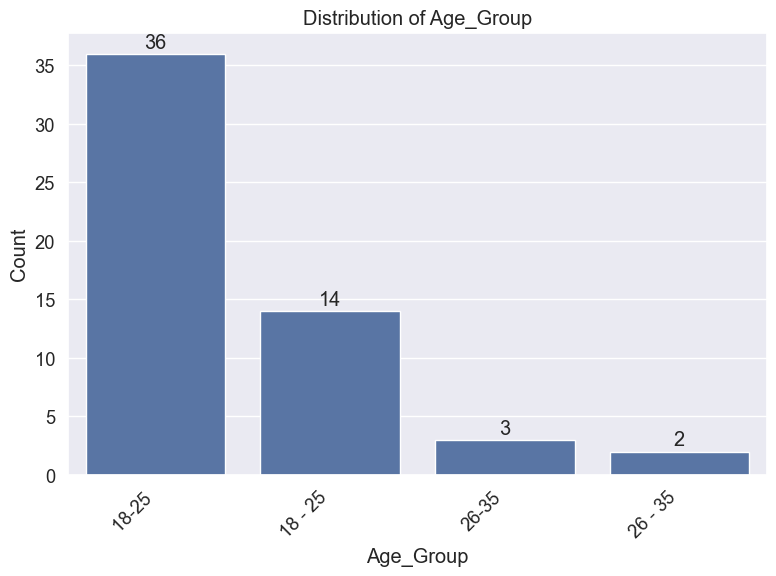

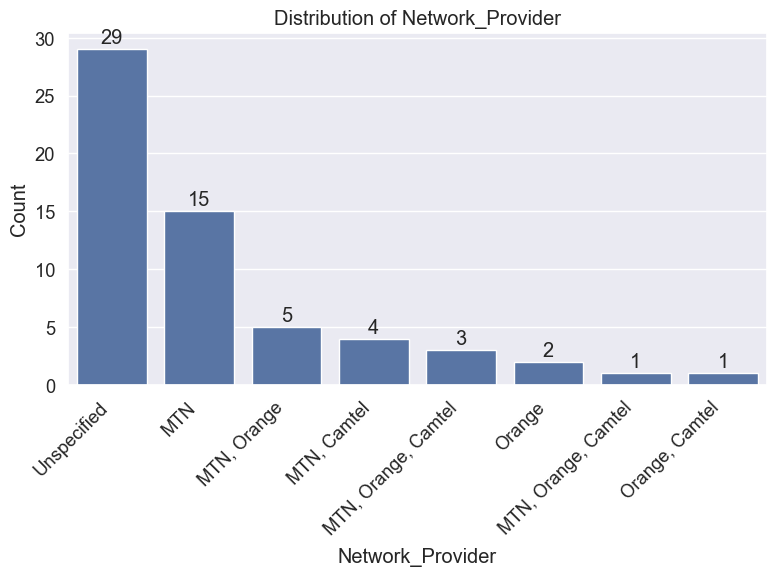

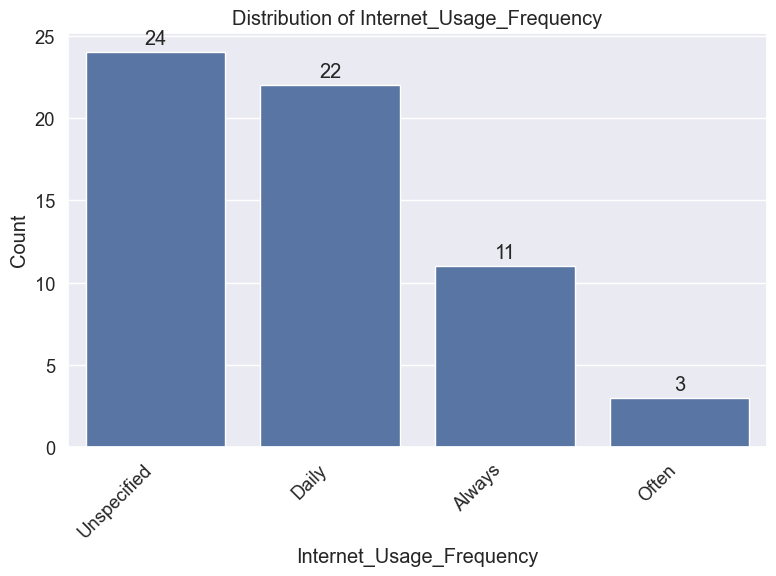

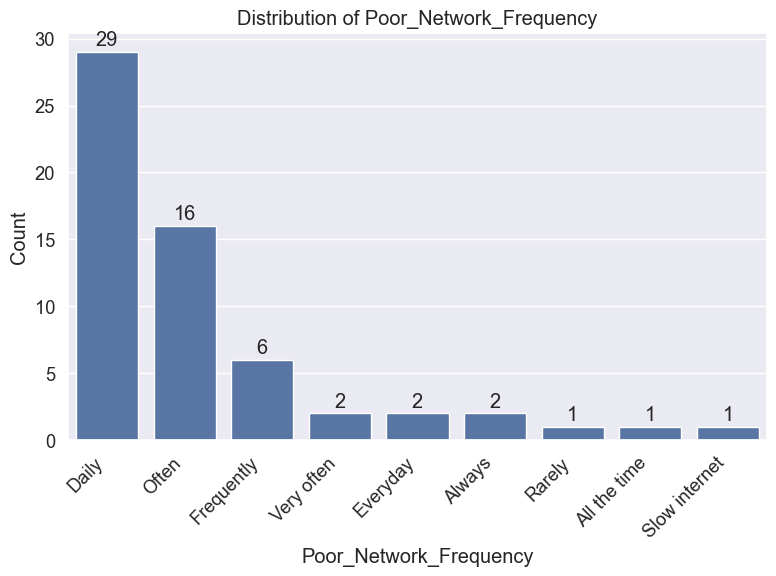

C:\Users\Agyingi\AppData\Local\Temp\ipykernel_1988\3929105945.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


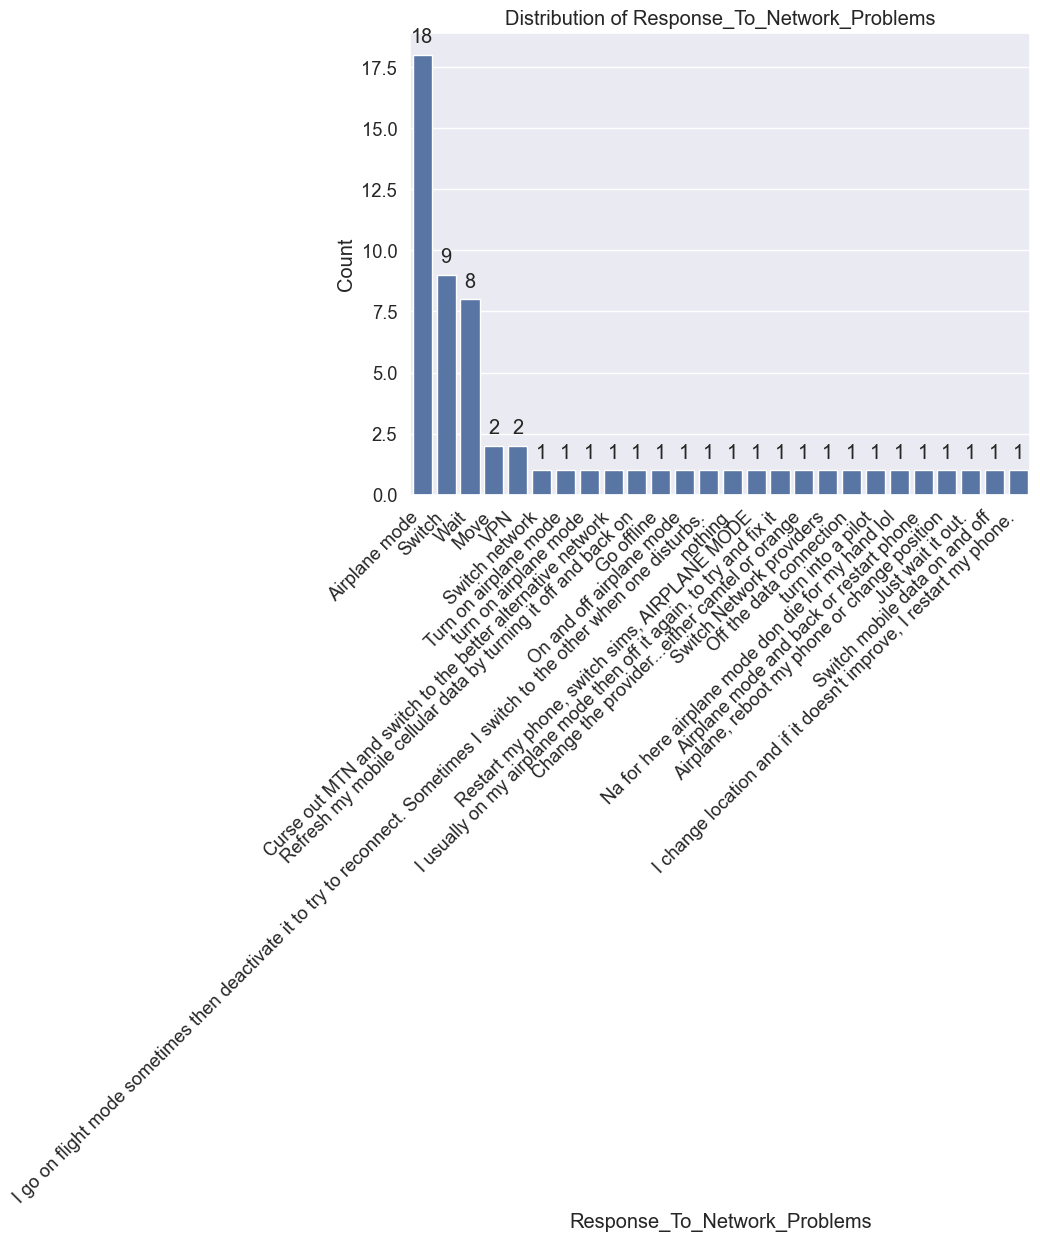

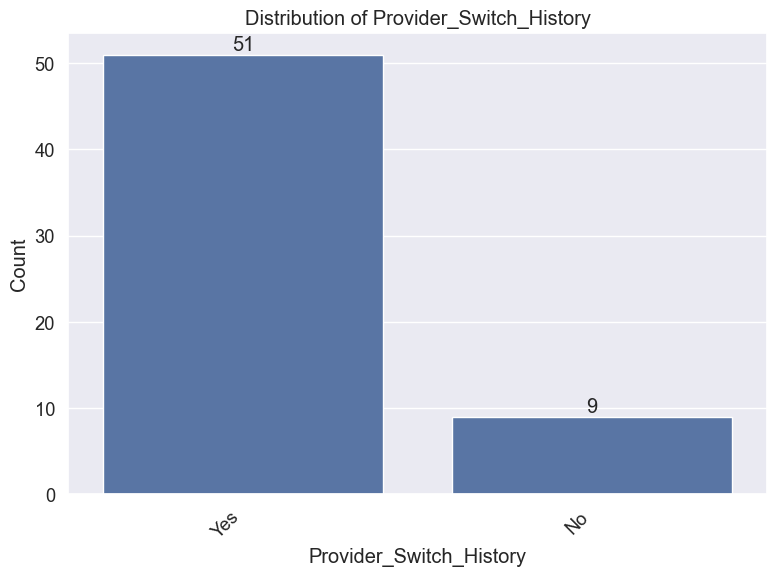

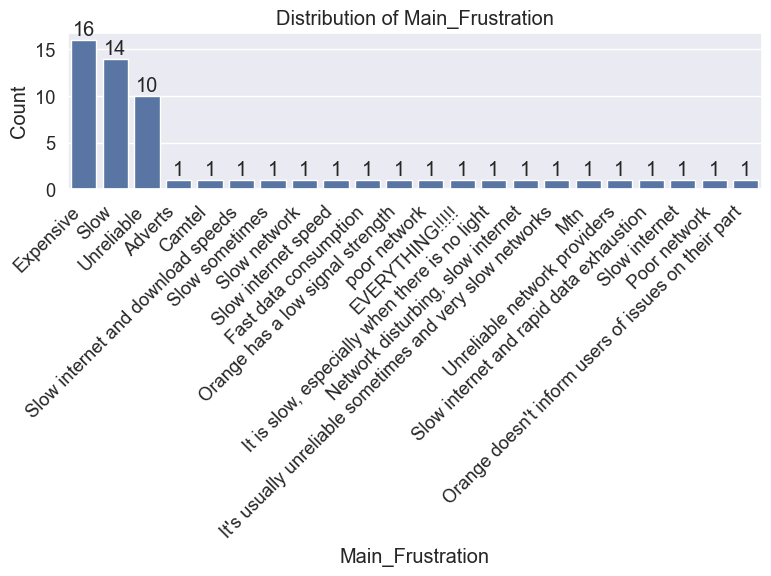

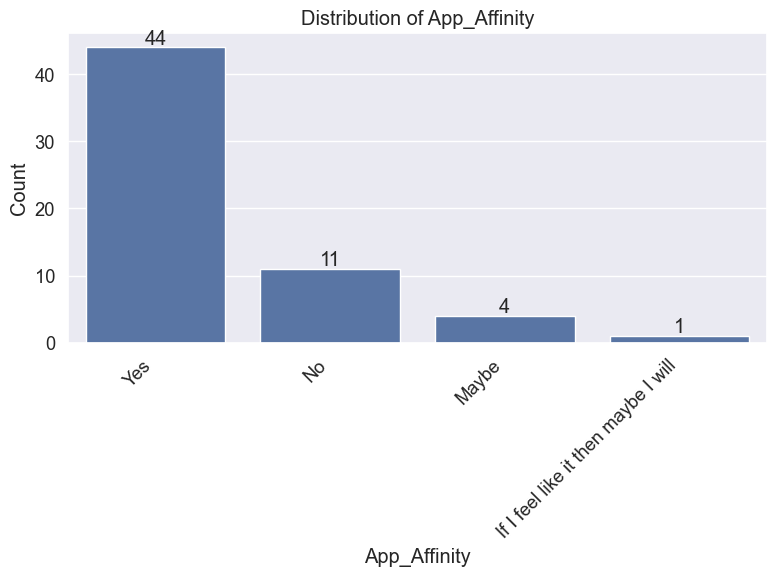

In [18]:
#Analysis of categorical variables
print("\n--- Analysis of Categorical Variables ---")

#function to plot categorical variables
def plot_categorical(df, column, title = None, figsize=(8,6)):
    plt.figure(figsize=figsize)

    counts = df[column].value_counts().sort_values(ascending = False)

    #Bar plot
    ax = sns.barplot(x=counts.index, y= counts.values)
    title = f'Distribution of {column}' if title is None else title
    plt.title(title)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    #Adding count labels on the bars
    for i, v in enumerate(counts.values):
        ax.text(i, v+0.5, str(v), ha='center')
    plt.tight_layout()
    plt.show()

#plot key categorical values
key_categorical_vars = ['Age_Group', 'Network_Provider', 'Internet_Usage_Frequency', 
                        'Poor_Network_Frequency', 'Response_To_Network_Problems',
                        'Provider_Switch_History', 'Main_Frustration', 'App_Affinity']

for var in key_categorical_vars:
    plot_categorical(df_clean, var)



--- Analysis of Numerical Variables ---


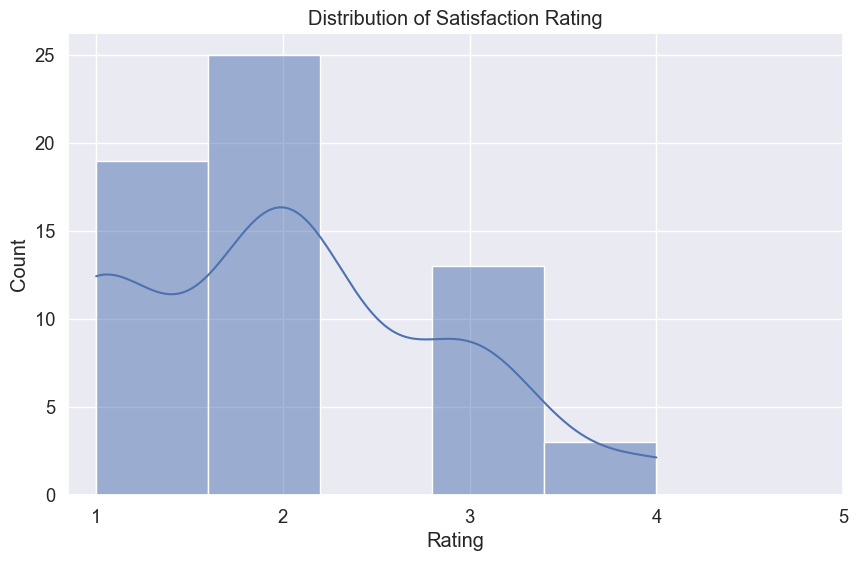


Satisfaction Rating Statistics:
count    60.000000
mean      2.000000
std       0.863576
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Satisfaction_Rating, dtype: float64


In [19]:
# Analysis of Numerical Variables
print("\n--- Analysis of Numerical Variables ---")

# For our dataset, Satisfaction_Rating is the main numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Satisfaction_Rating'], bins=5, kde=True)
plt.title('Distribution of Satisfaction Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

# Calculate statistics for Satisfaction_Rating
satisfaction_stats = df_clean['Satisfaction_Rating'].describe()
print("\nSatisfaction Rating Statistics:")
print(satisfaction_stats)


--- Relationships Between Variables ---


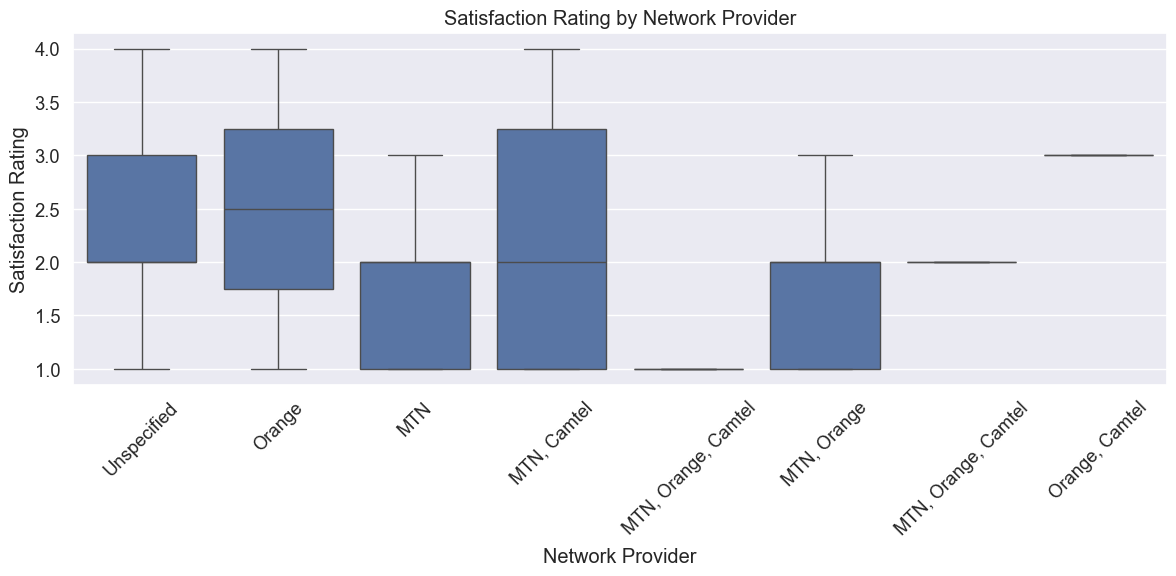

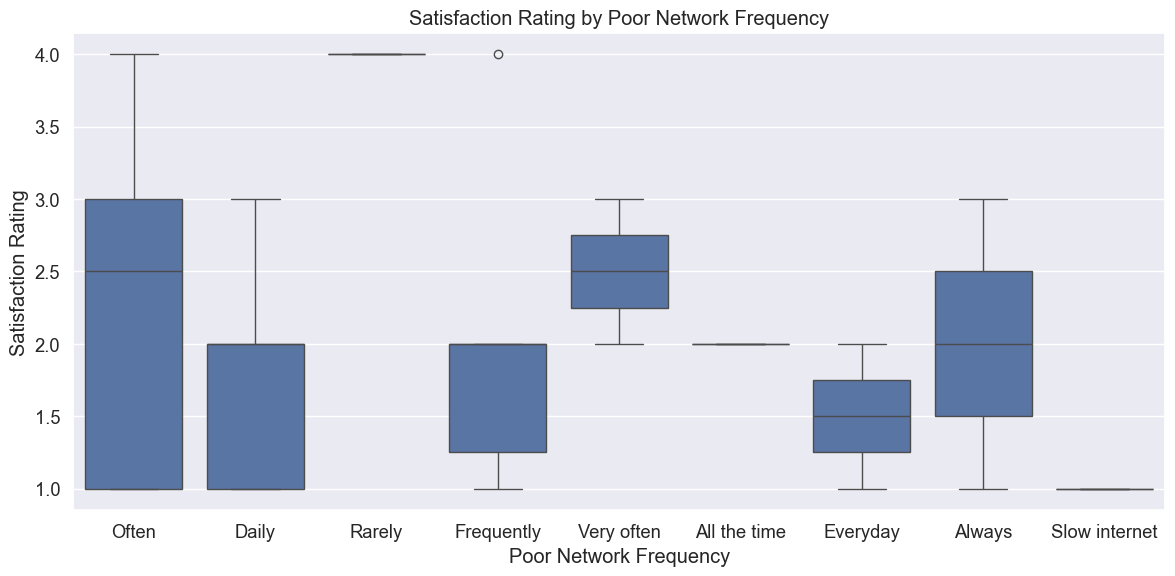

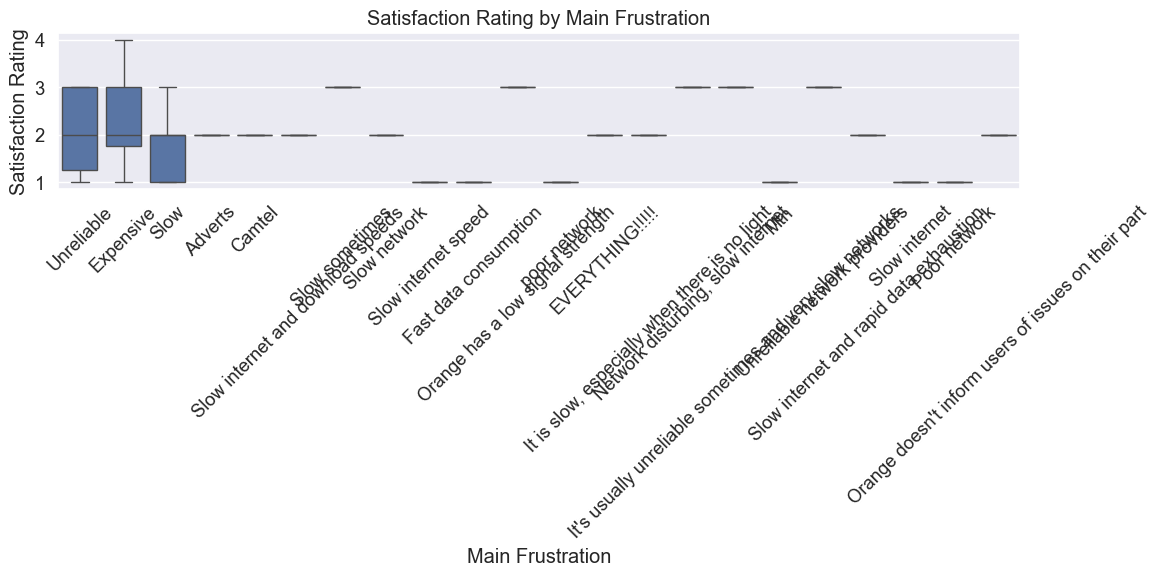

C:\Users\Agyingi\AppData\Local\Temp\ipykernel_1988\680436899.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

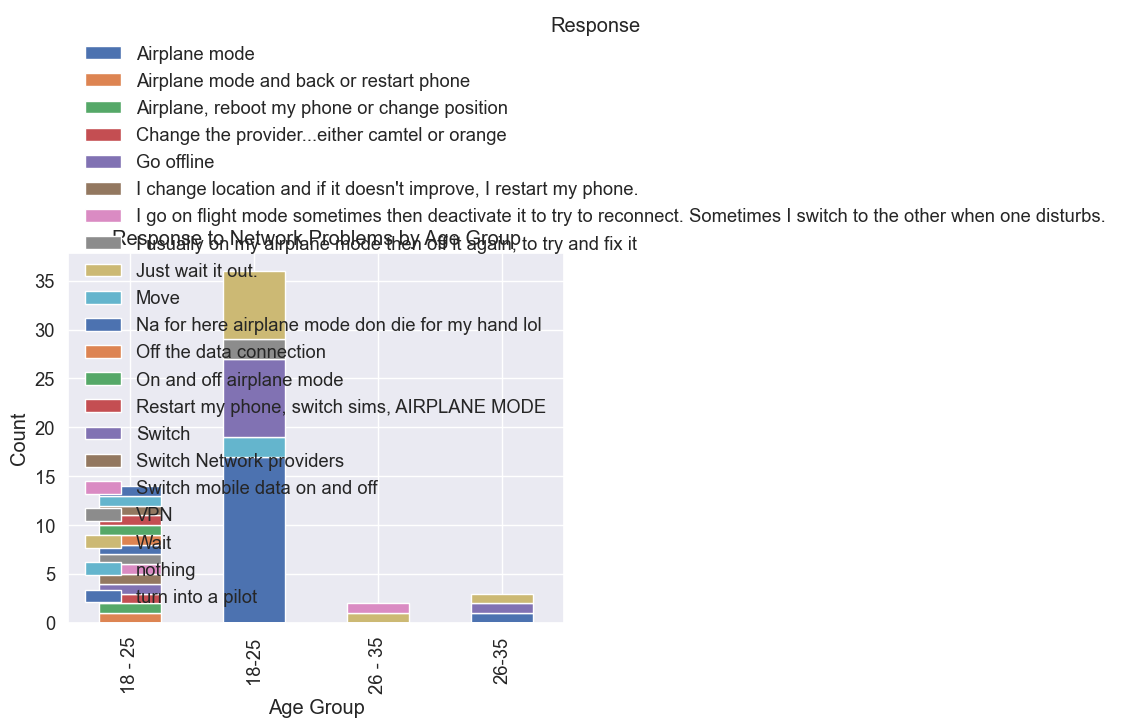

In [20]:
#Relationship between variables
print("\n--- Relationships Between Variables ---")

# Relationship between Network Provider and Satisfaction Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Network_Provider', y='Satisfaction_Rating', data=df_clean)
plt.title('Satisfaction Rating by Network Provider')
plt.xlabel('Network Provider')
plt.ylabel('Satisfaction Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Relationship between Poor Network Frequency and Satisfaction
plt.figure(figsize=(12, 6))
sns.boxplot(x='Poor_Network_Frequency', y='Satisfaction_Rating', data=df_clean)
plt.title('Satisfaction Rating by Poor Network Frequency')
plt.xlabel('Poor Network Frequency')
plt.ylabel('Satisfaction Rating')
plt.tight_layout()
plt.show()

# Relationship between Main Frustration and Satisfaction
plt.figure(figsize=(12, 6))
sns.boxplot(x='Main_Frustration', y='Satisfaction_Rating', data=df_clean)
plt.title('Satisfaction Rating by Main Frustration')
plt.xlabel('Main Frustration')
plt.ylabel('Satisfaction Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Let's look at response to network problems across age groups
plt.figure(figsize=(12, 8))
response_by_age = pd.crosstab(df_clean['Age_Group'], df_clean['Response_To_Network_Problems'])
response_by_age.plot(kind='bar', stacked=True)
plt.title('Response to Network Problems by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Response')
plt.tight_layout()
plt.show()

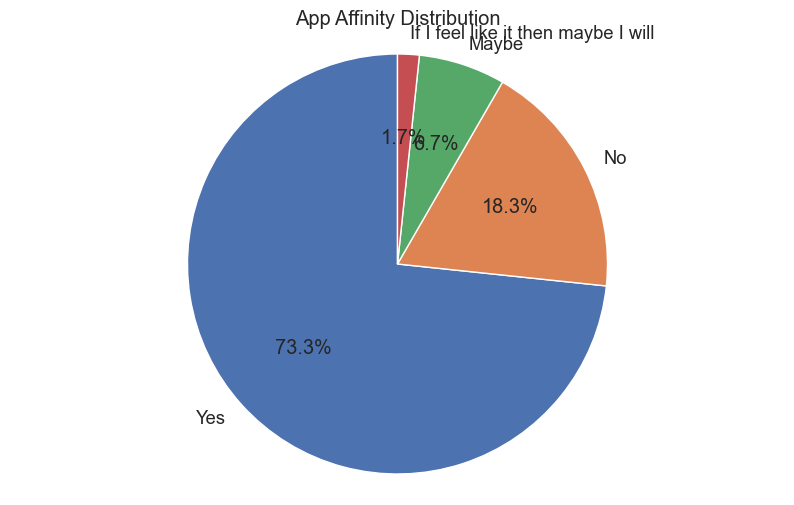

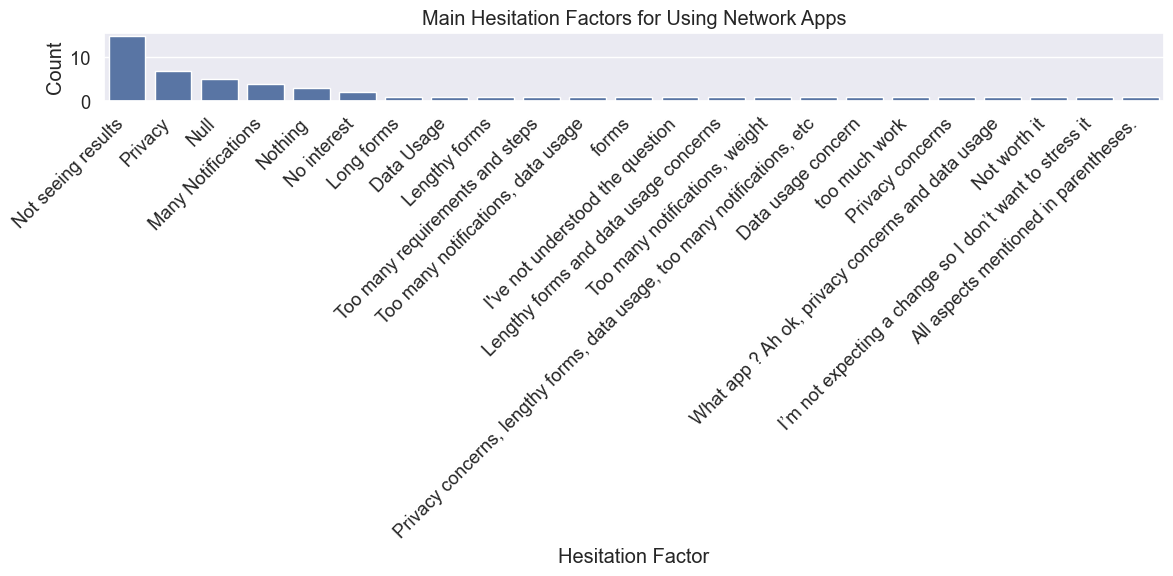

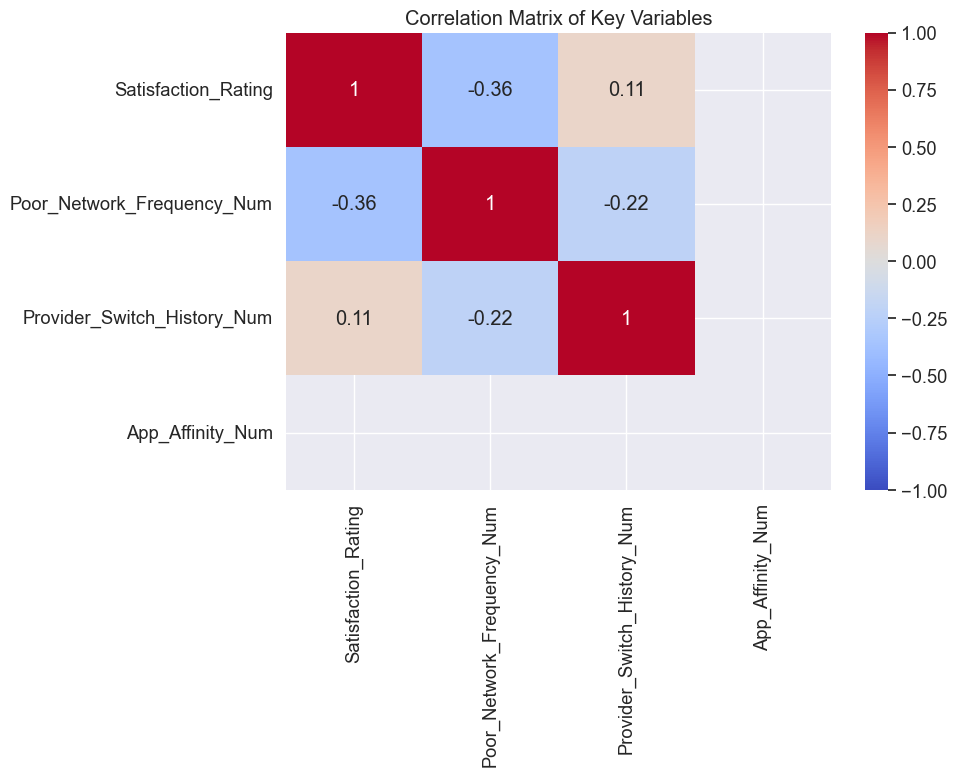

In [21]:
#App Affinity Analysis
plt.figure(figsize=(10, 6))
app_affinity_counts = df_clean['App_Affinity'].value_counts()
plt.pie(app_affinity_counts, labels=app_affinity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('App Affinity Distribution')
plt.axis('equal')
plt.show()

# What are the main hesitation factors for using apps?
plt.figure(figsize=(12, 6))
hesitation_counts = df_clean['Hesitation_Factors'].value_counts()
sns.barplot(x=hesitation_counts.index, y=hesitation_counts.values)
plt.title('Main Hesitation Factors for Using Network Apps')
plt.xlabel('Hesitation Factor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Correlation Analysis
# For our mostly categorical dataset, we'll convert some key categorical variables to numeric
# and then create a correlation matrix

# First, let's create a copy of the dataframe for this analysis
df_corr = df_clean.copy()

# Map categorical variables to numeric for correlation analysis
# For Poor_Network_Frequency
freq_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Daily': 4}
if 'Poor_Network_Frequency' in df_corr.columns:
    df_corr['Poor_Network_Frequency_Num'] = df_corr['Poor_Network_Frequency'].map(freq_map)

# For Provider_Switch_History
if 'Provider_Switch_History' in df_corr.columns:
    df_corr['Provider_Switch_History_Num'] = df_corr['Provider_Switch_History'].map({'No': 0, 'Yes': 1})

# For App_Affinity
if 'App_Affinity' in df_corr.columns:
    df_corr['App_Affinity_Num'] = df_corr['App_Affinity'].map({'no': 0, 'yes': 1})

# Create correlation matrix with numeric variables
numeric_columns = ['Satisfaction_Rating', 'Poor_Network_Frequency_Num', 
                   'Provider_Switch_History_Num', 'App_Affinity_Num']
numeric_columns = [col for col in numeric_columns if col in df_corr.columns]

if len(numeric_columns) > 1:  # Only create correlation matrix if we have multiple numeric columns
    correlation_matrix = df_corr[numeric_columns].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Key Variables')
    plt.tight_layout()
    plt.show()

In [25]:
# 6. Summary of Key Insights
print("\n--- Summary of Key Insights ---")
print(f"1. Average Satisfaction Rating: {df_clean['Satisfaction_Rating'].mean():.2f} out of 5")
print(f"2. Most Common Network Problem: {df_clean['Main_Frustration'].mode()[0]}")
print(f"3. Most Common Response to Network Problems: {df_clean['Response_To_Network_Problems'].mode()[0]}")
print(f"4. Percentage of Users Who Have Switched Providers: {(df_clean['Provider_Switch_History'] == 'Yes').mean() * 100:.1f}%")
print(f"5. Percentage of Users with App Affinity: {(df_clean['App_Affinity'] == 'Yes').mean() * 100:.1f}%")
print(f"5. Percentage of Users with Reward motivation: {(df_clean['Reward_Motivation'] == 'Yes').mean() * 100:.1f}%")
print(f"6. Most Common Hesitation Factor: {df_clean['Hesitation_Factors'].mode()[0]}")


--- Summary of Key Insights ---
1. Average Satisfaction Rating: 2.00 out of 5
2. Most Common Network Problem: Expensive
3. Most Common Response to Network Problems: Airplane mode
4. Percentage of Users Who Have Switched Providers: 85.0%
5. Percentage of Users with App Affinity: 73.3%
5. Percentage of Users with Reward motivation: 88.3%
6. Most Common Hesitation Factor: Not seeing results
